In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import os

# _FOLDER = "/home/ac1jjgg/MOGP_GPyTorch/FiveCancersDataSet/"
_FOLDER = "/home/juanjo/Work_Postdoc/my_codes_postdoc/GPyTorch_Models/Codes_For_GDSC2/"
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
df_Feature_Names_Melanoma = pd.read_csv(_FOLDER + "Best_Model_MelanomaGDSC2_ExactMOGP/Name_Features_MelanomaGDSC2.csv")

In [2]:
List_Names_Melanoma = list(df_Feature_Names_Melanoma.values[:,1])

In [3]:
List_Names_Melanoma

['AFF4_mut',
 'AHCTF1_mut',
 'AKAP9_mut',
 'ANK3_mut',
 'APC_mut',
 'ARFGAP3_mut',
 'ARHGAP29_mut',
 'ARID1A_mut',
 'ARID1B_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ASPM_mut',
 'ASXL2_mut',
 'ATM_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'CDC27_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHEK2_mut',
 'CLASP2_mut',
 'CLSPN_mut',
 'CREBBP_mut',
 'CTCF_mut',
 'CTNNB1_mut',
 'CUL2_mut',
 'CUX1_mut',
 'DHX15_mut',
 'ELF1_mut',
 'EP300_mut',
 'EZH2_mut',
 'FAM123B_mut',
 'FGFR2_mut',
 'GNA11_mut',
 'HDAC9_mut',
 'HRAS_mut',
 'INPP4A_mut',
 'INPPL1_mut',
 'KDM6A_mut',
 'LAMA2_mut',
 'LPHN2_mut',
 'LRP6_mut',
 'MACF1_mut',
 'MAGI2_mut',
 'MAP2K1_mut',
 'MAP3K4_mut',
 'MCM8_mut',
 'MECOM_mut',
 'MGA_mut',
 'MLL2_mut',
 'MLL3_mut',
 'MYH11_mut',
 'MYH14_mut',
 'MYH9_mut',
 'NCOR1_mut',
 'NF1_mut',
 'NRAS_mut',
 'PABPC3_mut',
 'PCDH18_mut',
 'PHLPP1_mut',
 'PIK3R1_mut',
 'PLCB1_mut',
 'PLXNA1_mut',
 'PSIP1_mut',
 'PTEN_mut',
 'RAC1_mut',
 'RB1_mut',

In [4]:
#List_Names_Melanoma[14]
#np.where(df_Feature_Names_Melanoma=="BRAF_mut")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN65")
np.where(df_Feature_Names_Melanoma=="BRAF_mut")
#np.where(df_Feature_Names_Melanoma=="loss:cnaPANCAN30 (LARP4B)")

(array([18]), array([1]))

(345, 419)


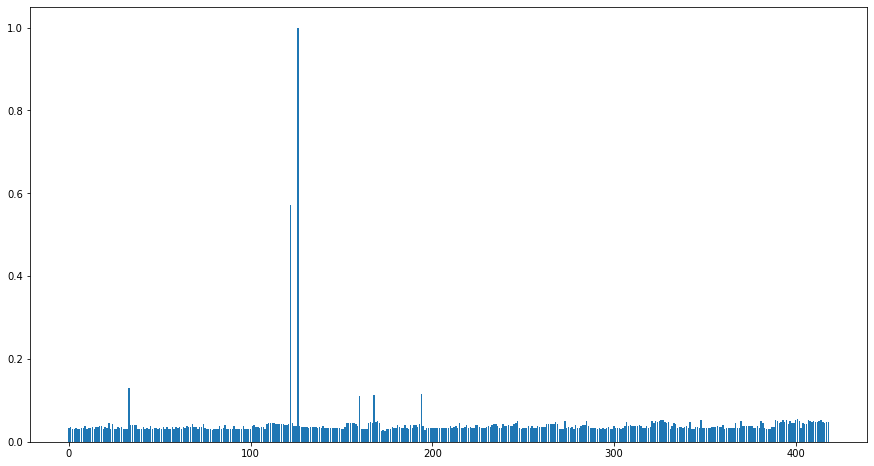

In [27]:
which_MOGPmodel = "m440_Delta_e-6"  #best: m440; second-best: m34
N = 345
Pfeatures = df_Feature_Names_Melanoma.shape[0]
#df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
df_KLRelevance_Mtx_MOGP = pd.read_csv(_FOLDER+'Best_Model_MelanomaGDSC2_ExactMOGP/Relevance_MelanomaGDSC2_ExactMOGP_'+which_MOGPmodel+'.txt', names=["col"+str(i) for i in range(N+1)])
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_Melanoma_SOGP_IC50/Relevance_Melanoma_SOGP_IC50.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted_MOGP = df_KLRelevance_Mtx_MOGP.sort_values(by=['col0'])
KL_Relevance_MOGP = df_sorted_MOGP.values
KL_Relevance_MOGP = KL_Relevance_MOGP[:,1:].T  #We getrid of first index position
print(KL_Relevance_MOGP.shape)
KL_p_MOGP = np.mean(KL_Relevance_MOGP,0)
plt.figure(figsize = (15,8))
plt.bar(np.arange(0,Pfeatures),KL_p_MOGP/KL_p_MOGP.max())
#plt.plot(np.arange(0,Pfeatures),KL_p_MOGP/KL_p_MOGP.max(),'x')

df_KLR_With_Column_Names_MOGP = pd.DataFrame(KL_p_MOGP[None,:]/KL_p_MOGP.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted_MOGP = df_KLR_With_Column_Names_MOGP.sort_values(by= 0,axis=1,ascending = False)

In [28]:
#np.mean(KL_Relevance_MOGP,0)
#df_sorted_MOGP
#df_KLRelevance_Mtx_MOGP
#df_KLRelevance_Mtx
#df_sorted_MOGP["col0"].values == np.arange(0,419)
#df_sorted_MOGP["col0"].values
#check_pos
# check_pos = np.arange(0,419)
# for i in range(419):
#     if df_sorted_MOGP["col0"].values[i]==check_pos[i]: 
#         print(i)

In [29]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names_MOGP[df_KLR_With_Column_Names_MOGP.columns[0:19]]

,AFF4_mut,AHCTF1_mut,AKAP9_mut,ANK3_mut,APC_mut,ARFGAP3_mut,ARHGAP29_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ARID4A_mut,ASPM_mut,ASXL2_mut,ATM_mut,B2M_mut,BAP1_mut,BAZ2B_mut,BPTF_mut,BRAF_mut
0,0.03291,0.035437,0.03152,0.029988,0.033046,0.030524,0.030524,0.03289,0.032761,0.0374,0.030002,0.033215,0.033168,0.034904,0.031254,0.035588,0.034876,0.037352,0.039014


In [30]:
#Top 30 most important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[0:30]].min()

loss:cnaPANCAN47                             1.000000
loss:cnaPANCAN43                             0.571689
ELF1_mut                                     0.128957
loss:cnaPANCAN145 (FANCG,PAX5)               0.114948
loss:cnaPANCAN95                             0.113115
loss:cnaPANCAN82                             0.109434
chr2:183731819-183732093(FRZB)_HypMET        0.053886
loss:cnaPANCAN340                            0.053547
chr19:49315545-49315765(BCAT2)_HypMET        0.052970
chr1:40782220-40783145(COL9A2)_HypMET        0.052147
chr15:30685087-30685891(CHRFAM7A)_HypMET     0.052055
complexity                                   0.052031
loss:cnaPANCAN339 (ATRX)                     0.051857
loss:cnaPANCAN378 (ZNRF3)                    0.051852
h_bond_acceptor_count                        0.051726
chr15:93198374-93199181(FAM174B)_HypMET      0.051630
loss:cnaPANCAN210 (FAT1,IRF2)                0.051375
Cl                                           0.051131
loss:cnaPANCAN336           

In [31]:
#Top 30 least important features out of 826 features
df_KL_Col_Names_Sorted_MOGP[df_KL_Col_Names_Sorted_MOGP.columns[-30:]].min()

LAMA2_mut                           0.030553
CUX1_mut                            0.030539
SMARCA1_mut                         0.030526
ARFGAP3_mut                         0.030524
ARHGAP29_mut                        0.030524
GNA11_mut                           0.030516
loss:cnaPANCAN116                   0.030516
MCM8_mut                            0.030510
MLL3_mut                            0.030389
STIP1_mut                           0.030383
WHSC1L1_mut                         0.030335
loss:cnaPANCAN8                     0.030296
RB1_mut                             0.030289
loss:cnaPANCAN6                     0.030277
loss:cnaPANCAN15                    0.030151
STAG2_mut                           0.030122
WT1_mut                             0.030118
CEP290_mut                          0.030065
gain:cnaPANCAN28 (CUL2,EPC1)        0.030060
loss:cnaPANCAN371                   0.030055
CLSPN_mut                           0.030028
ARID4A_mut                          0.030002
ANK3_mut  

### Check for BRAF ranking position

In [32]:
np.where(df_KL_Col_Names_Sorted_MOGP.columns=="BRAF_mut")

(array([128]),)

# Analysis for SOGP when training over IC50

(345, 419)


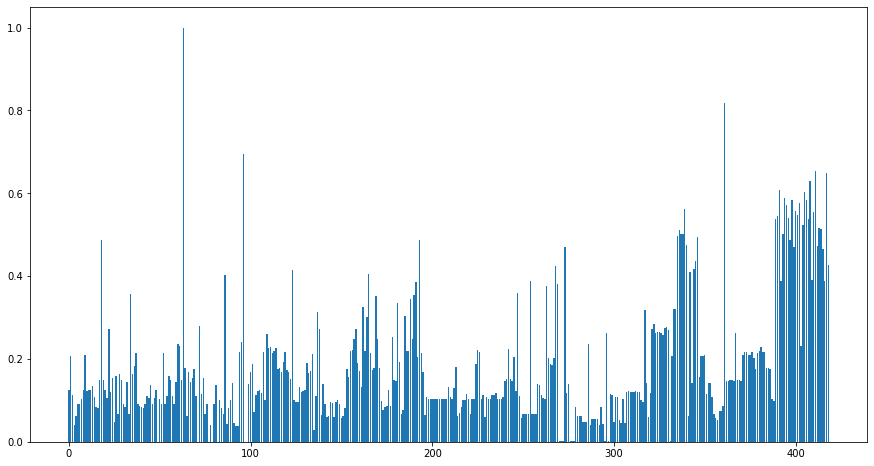

In [73]:
which_model = "m66_Delta_e-5"   #best: m66; second-best: m144
N = 345
Pfeatures = df_Feature_Names_Melanoma.shape[0]
#df_melanoma = pd.read_csv(_FOLDER+name_for_KLrelevance)
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Relevance_KL_HPC_Melanoma.txt', names=["col"+str(i) for i in range(df_train_No_MolecForm.shape[0]+1)])
#df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_MelanomaGDSC2_SOGP_IC50/Relevance_MelanomaGDSC2_SOGP_IC50.txt', names=["col"+str(i) for i in range(N+1)])
df_KLRelevance_Mtx = pd.read_csv(_FOLDER+'Best_Model_MelanomaGDSC2_SOGP_IC50/Relevance_MelanomaGDSC2_SOGP_IC50_'+which_model+'.txt', names=["col"+str(i) for i in range(N+1)])

df_sorted = df_KLRelevance_Mtx.sort_values(by=['col0'])
KL_Relevance = df_sorted.values
KL_Relevance = KL_Relevance[:,1:].T  #We getrid of first index position
print(KL_Relevance.shape)
KL_p = np.mean(KL_Relevance,0)
plt.figure(figsize = (15,8))
plt.bar(np.arange(0,Pfeatures),KL_p/KL_p.max())

df_KLR_With_Column_Names = pd.DataFrame(KL_p[None,:]/KL_p.max(), columns=List_Names_Melanoma)
df_KL_Col_Names_Sorted = df_KLR_With_Column_Names.sort_values(by= 0,axis=1,ascending = False)

In [74]:
Pfeatures
#KL_p/KL_p.max()
#df_sorted
#df_sorted
#df_KLRelevance_Mtx
#df_sorted["col0"].values == np.arange(0,419)
#df_sorted["col0"].values
# check_pos = np.arange(0,419)
# for i in range(419):
#     if df_sorted["col0"].values[i]==check_pos[i]: 
#         print(i)

419

In [75]:
#df_KLRelevance_Mtx
#df_sorted
#df_sorted.values.shape
df_KLR_With_Column_Names[df_KLR_With_Column_Names.columns[0:19]]

,AFF4_mut,AHCTF1_mut,AKAP9_mut,ANK3_mut,APC_mut,ARFGAP3_mut,ARHGAP29_mut,ARID1A_mut,ARID1B_mut,ARID2_mut,ARID4A_mut,ASPM_mut,ASXL2_mut,ATM_mut,B2M_mut,BAP1_mut,BAZ2B_mut,BPTF_mut,BRAF_mut
0,0.124885,0.206856,0.111967,0.041658,0.061966,0.090172,0.090172,0.104085,0.124874,0.209941,0.12341,0.125,0.125,0.135827,0.10741,0.084848,0.081163,0.14997,0.488092


In [76]:
#Top 30 most important features out of 419 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[0:32]].min()

PCDH18_mut                                      1.000000
gain:cnaPANCAN394 (GNG2,SOS2)                   0.818436
loss:cnaPANCAN2 (STK11)                         0.694097
xlogp                                           0.654034
F                                               0.649641
Cl                                              0.629491
chr12:124246524-124247254(DNAH10)_HypMET        0.607444
chr6:291948-292839(DUSP22)_HypMET               0.603505
chr15:81426499-81426702(C15orf26)_HypMET        0.587495
chr18:77905297-77905566(LOC100130522)_HypMET    0.584823
chr8:95652455-95652873(ESRP1)_HypMET            0.583527
chr22:19746924-19747141(TBX1)_HypMET            0.577398
chr15:93198374-93199181(FAM174B)_HypMET         0.570822
gain:cnaPANCAN366                               0.563068
chr19:49315545-49315765(BCAT2)_HypMET           0.557042
S                                               0.553874
chr2:183731819-183732093(FRZB)_HypMET           0.546457
chr10:93392667-93393147(PPP1R3C

In [77]:
#Top 30 least important features out of 385 features
df_KL_Col_Names_Sorted[df_KL_Col_Names_Sorted.columns[-50:]].min()

loss:cnaPANCAN251                    0.062354
loss:cnaPANCAN253                    0.062354
APC_mut                              0.061966
loss:cnaPANCAN368                    0.061478
gain:cnaPANCAN190 (FGFR3,WHSC1)      0.059733
loss:cnaPANCAN326 (SOX9)             0.059579
loss:cnaPANCAN68                     0.059280
loss:cnaPANCAN64                     0.059280
loss:cnaPANCAN72                     0.058595
gain:cnaPANCAN214                    0.058012
loss:cnaPANCAN387                    0.057938
loss:cnaPANCAN259                    0.055460
loss:cnaPANCAN260                    0.055393
loss:cnaPANCAN261                    0.055393
loss:cnaPANCAN262 (FOXP1)            0.055259
loss:cnaPANCAN388                    0.051959
loss:cnaPANCAN294                    0.051461
loss:cnaPANCAN281 (RPL22)            0.048339
CLASP2_mut                           0.048271
loss:cnaPANCAN254                    0.046819
loss:cnaPANCAN256 (CACNA1D,WNT5A)    0.046819
loss:cnaPANCAN255                 

### Check for BRAF ranking position for SOGP_IC50

In [78]:
np.where(df_KL_Col_Names_Sorted.columns=="BRAF_mut")

(array([31]),)

In [66]:
List_Names_Melanoma

['AFF4_mut',
 'AHCTF1_mut',
 'AKAP9_mut',
 'ANK3_mut',
 'APC_mut',
 'ARFGAP3_mut',
 'ARHGAP29_mut',
 'ARID1A_mut',
 'ARID1B_mut',
 'ARID2_mut',
 'ARID4A_mut',
 'ASPM_mut',
 'ASXL2_mut',
 'ATM_mut',
 'B2M_mut',
 'BAP1_mut',
 'BAZ2B_mut',
 'BPTF_mut',
 'BRAF_mut',
 'BRCA2_mut',
 'BRWD1_mut',
 'CDC27_mut',
 'CDKN2A_mut',
 'CEP290_mut',
 'CHEK2_mut',
 'CLASP2_mut',
 'CLSPN_mut',
 'CREBBP_mut',
 'CTCF_mut',
 'CTNNB1_mut',
 'CUL2_mut',
 'CUX1_mut',
 'DHX15_mut',
 'ELF1_mut',
 'EP300_mut',
 'EZH2_mut',
 'FAM123B_mut',
 'FGFR2_mut',
 'GNA11_mut',
 'HDAC9_mut',
 'HRAS_mut',
 'INPP4A_mut',
 'INPPL1_mut',
 'KDM6A_mut',
 'LAMA2_mut',
 'LPHN2_mut',
 'LRP6_mut',
 'MACF1_mut',
 'MAGI2_mut',
 'MAP2K1_mut',
 'MAP3K4_mut',
 'MCM8_mut',
 'MECOM_mut',
 'MGA_mut',
 'MLL2_mut',
 'MLL3_mut',
 'MYH11_mut',
 'MYH14_mut',
 'MYH9_mut',
 'NCOR1_mut',
 'NF1_mut',
 'NRAS_mut',
 'PABPC3_mut',
 'PCDH18_mut',
 'PHLPP1_mut',
 'PIK3R1_mut',
 'PLCB1_mut',
 'PLXNA1_mut',
 'PSIP1_mut',
 'PTEN_mut',
 'RAC1_mut',
 'RB1_mut',